# **IRIS FLOWER CLASSIFICATION**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import missingno as msno
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [ ]:
#Configure plotting style and ignore warnings
sns.set_theme(style="whitegrid")
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (15, 8)

In [ ]:
df = pd.read_csv("Iris.csv")
df.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [ ]:
df.drop('Id', axis=1, inplace=True)

In [ ]:
df.drop_duplicates(inplace=True)
assert df.isnull().sum().sum() == 0, "There are missing values in the dataset"

Text(0.5, 1.0, 'Sepal Length for different species')

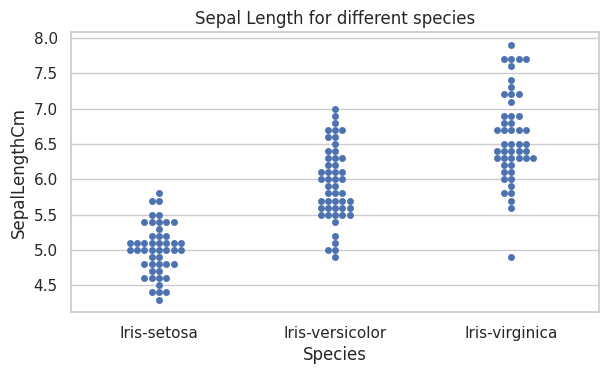

In [ ]:
plt.subplot(2, 2, 1)
sns.swarmplot(x='Species', y='SepalLengthCm', data=df)
plt.title('Sepal Length for different species')

Text(0.5, 1.0, 'Sepal Width for different species')

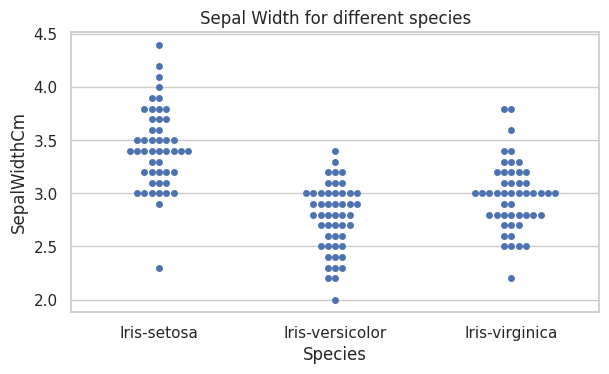

In [ ]:
plt.subplot(2, 2, 2)
sns.swarmplot(x='Species', y='SepalWidthCm', data=df)
plt.title('Sepal Width for different species')

In [ ]:
plt.tight_layout()
plt.show()


<Figure size 1500x800 with 0 Axes>

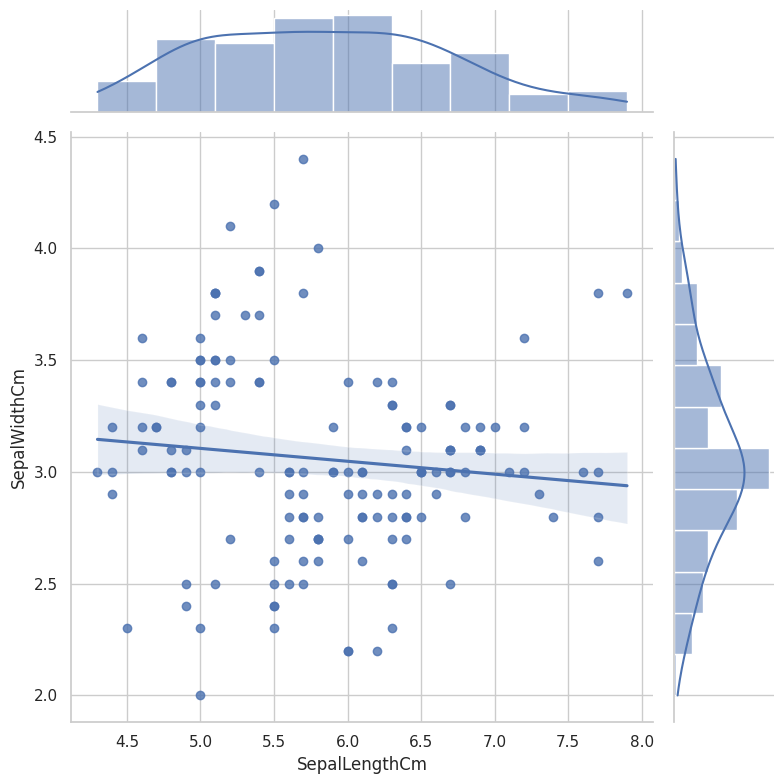

In [ ]:
sns.jointplot(x='SepalLengthCm', y='SepalWidthCm', data=df, kind='reg', height=8)
plt.show()

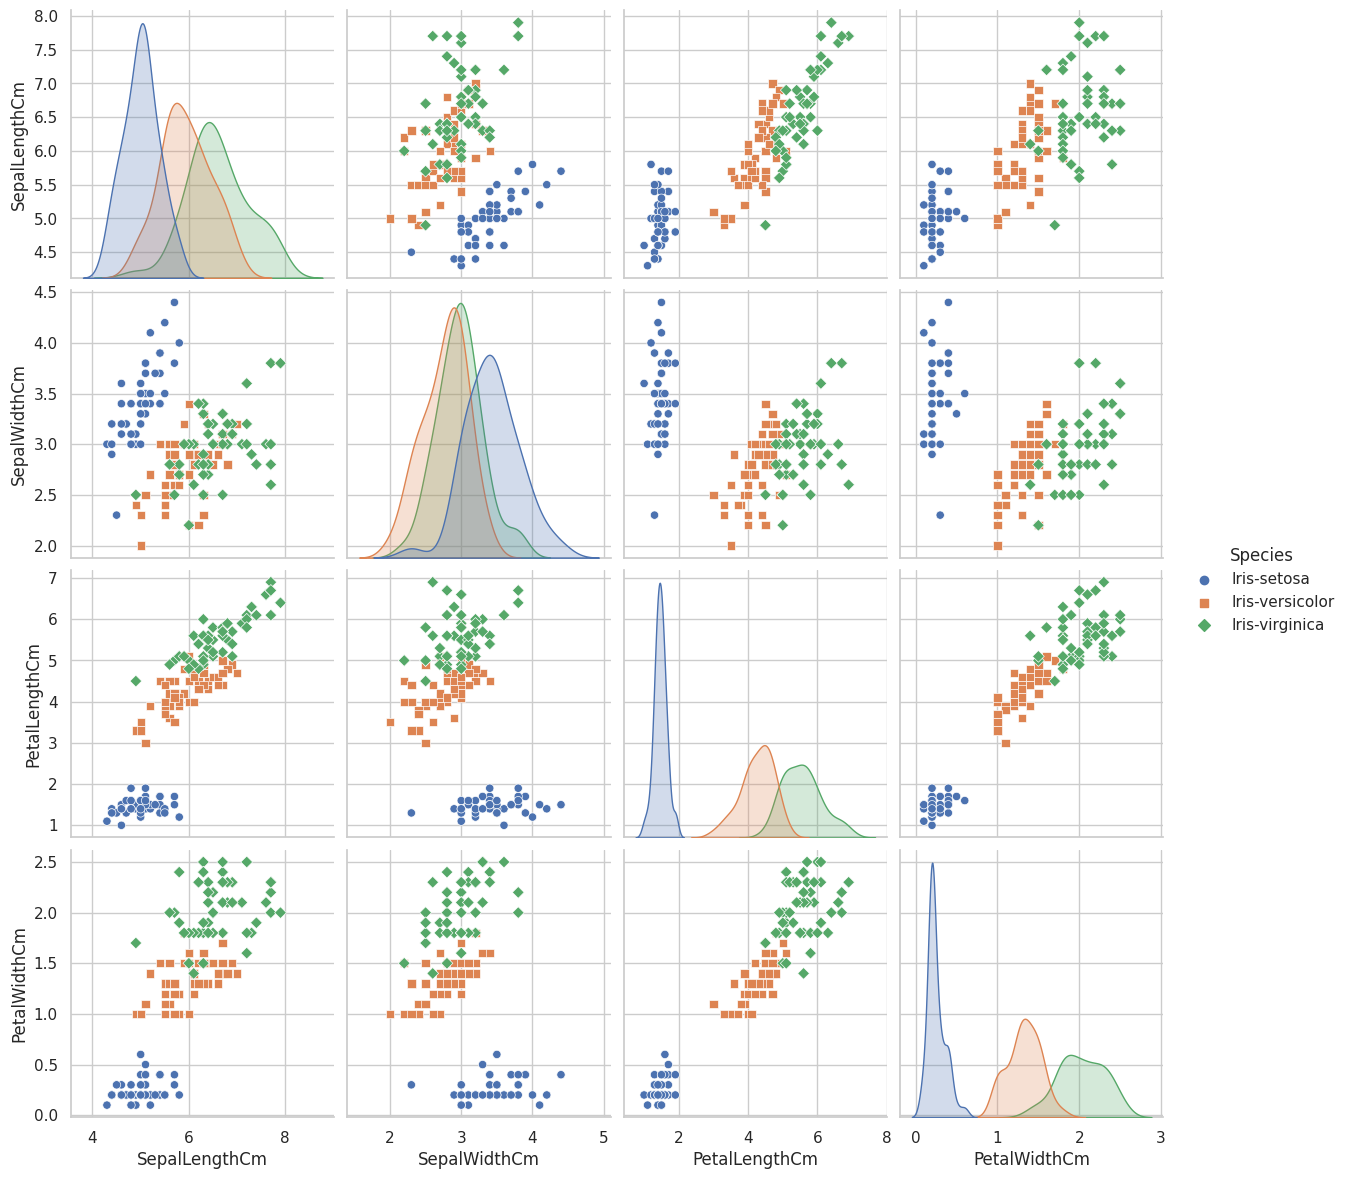

In [ ]:
sns.pairplot(df, hue="Species", height=3, markers=["o", "s", "D"])
plt.show()

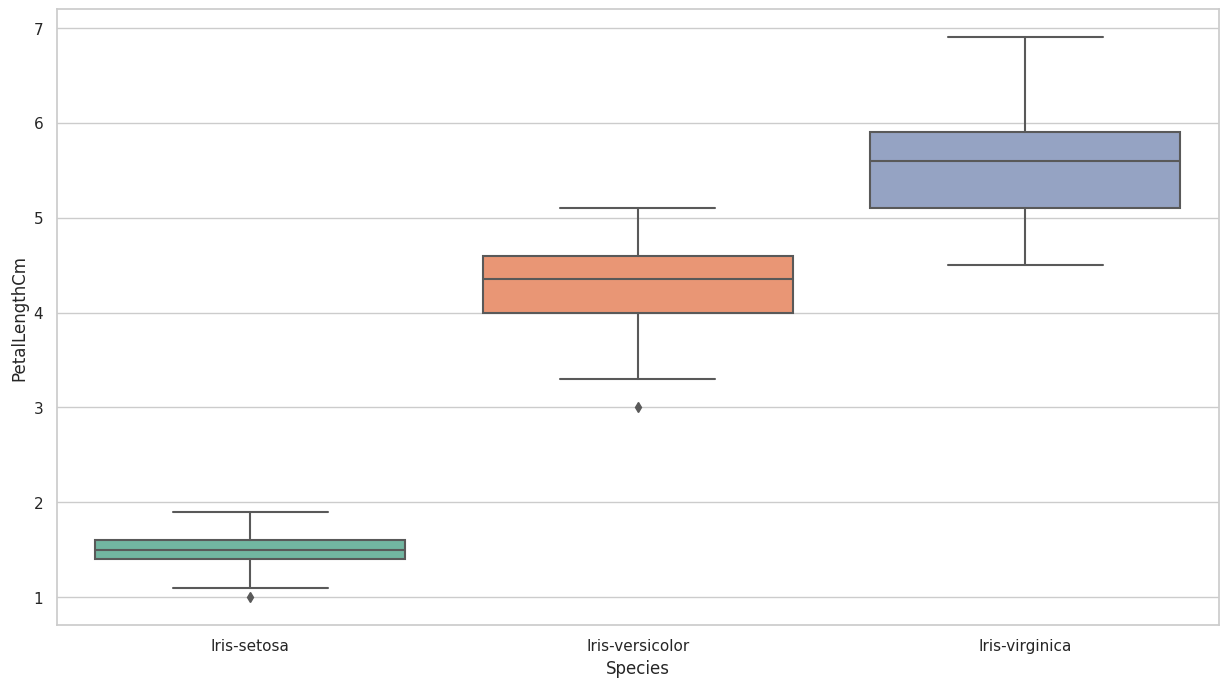

In [ ]:
sns.boxplot(data=df, x="Species", y='PetalLengthCm', palette="Set2")
plt.show()

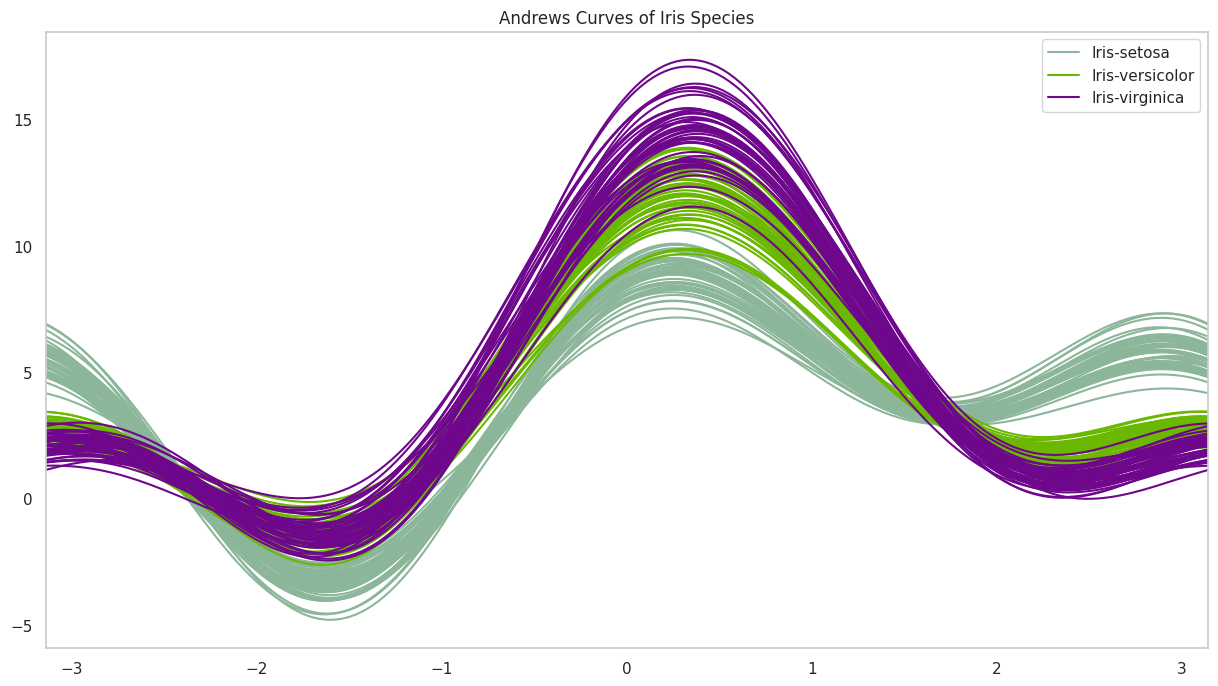

In [ ]:
plt.figure()
pd.plotting.andrews_curves(df, "Species")
plt.title('Andrews Curves of Iris Species')
plt.show()

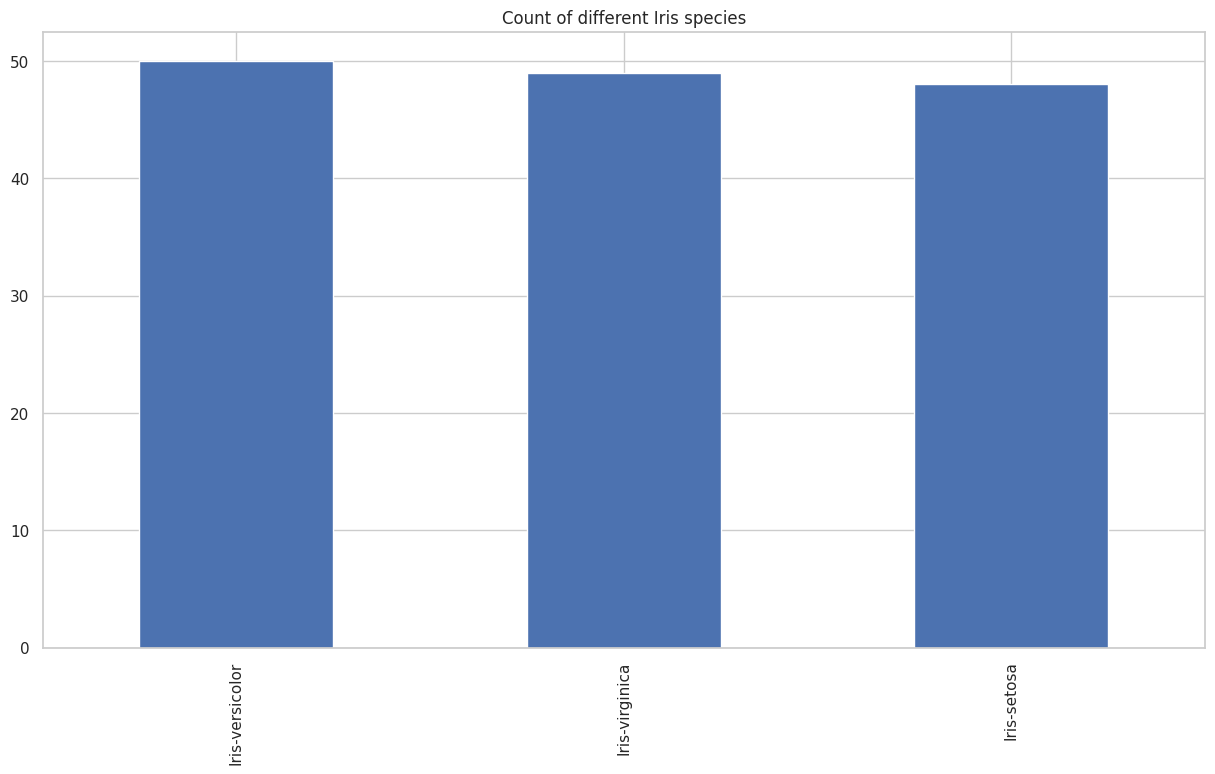

In [ ]:
species_count = df['Species'].value_counts()
species_count.plot(kind='bar', stacked=True)
plt.title('Count of different Iris species')
plt.show()

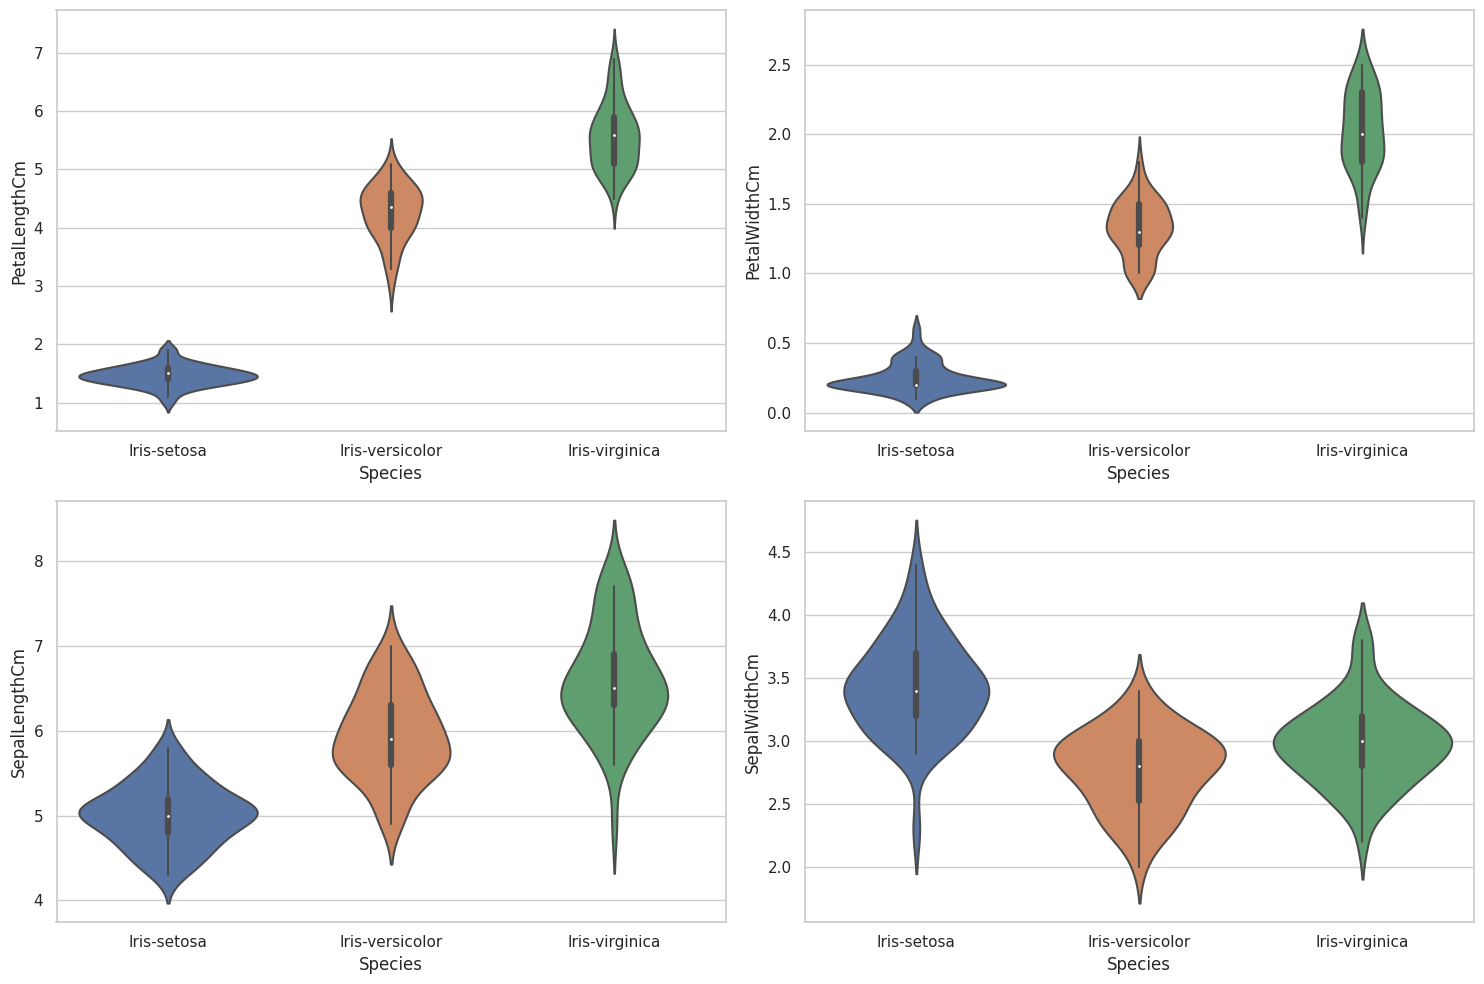

In [ ]:
plt.figure(figsize=(15, 10))
feature_columns = ['PetalLengthCm', 'PetalWidthCm', 'SepalLengthCm', 'SepalWidthCm']
for i, column in enumerate(feature_columns, 1):
    plt.subplot(2, 2, i)
    sns.violinplot(x='Species', y=column, data=df)
plt.tight_layout()
plt.show()

In [ ]:
# Neural Network Model
# Label Encoding for the target variable
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])

In [ ]:
X = df.drop('Species', axis=1)
y = to_categorical(df['Species'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=123)

In [ ]:
model = Sequential()
model.add(Dense(100, activation='relu', input_shape=(4,)))
model.add(Dense(3, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=45, validation_data=(X_test, y_test))

Epoch 1/45
4/4 [==============================] - 2s 132ms/step - loss: 0.9752 - accuracy: 0.4804 - val_loss: 0.9681 - val_accuracy: 0.5556
Epoch 2/45
4/4 [==============================] - 0s 29ms/step - loss: 0.8798 - accuracy: 0.6961 - val_loss: 0.8562 - val_accuracy: 0.7556
Epoch 3/45
4/4 [==============================] - 0s 23ms/step - loss: 0.8362 - accuracy: 0.8431 - val_loss: 0.7619 - val_accuracy: 0.8889
Epoch 4/45
4/4 [==============================] - 0s 26ms/step - loss: 0.7927 - accuracy: 0.8039 - val_loss: 0.7054 - val_accuracy: 0.9333
Epoch 5/45
4/4 [==============================] - 0s 41ms/step - loss: 0.7539 - accuracy: 0.9020 - val_loss: 0.6704 - val_accuracy: 0.9111
Epoch 6/45
4/4 [==============================] - 0s 56ms/step - loss: 0.7141 - accuracy: 0.9314 - val_loss: 0.6368 - val_accuracy: 0.9111
Epoch 7/45
4/4 [==============================] - 0s 42ms/step - loss: 0.6843 - accuracy: 0.9412 - val_loss: 0.6073 - val_accuracy: 0.9111
Epoch 8/45
4/4 [==========

In [ ]:
evaluation = model.evaluate(X_test, y_test)
print(f"Test Loss: {evaluation[0]}, Test Accuracy: {evaluation[1]}")

2/2 [==============================] - 0s 6ms/step - loss: 0.2877 - accuracy: 0.9556
Test Loss: 0.2877388894557953, Test Accuracy: 0.9555555582046509


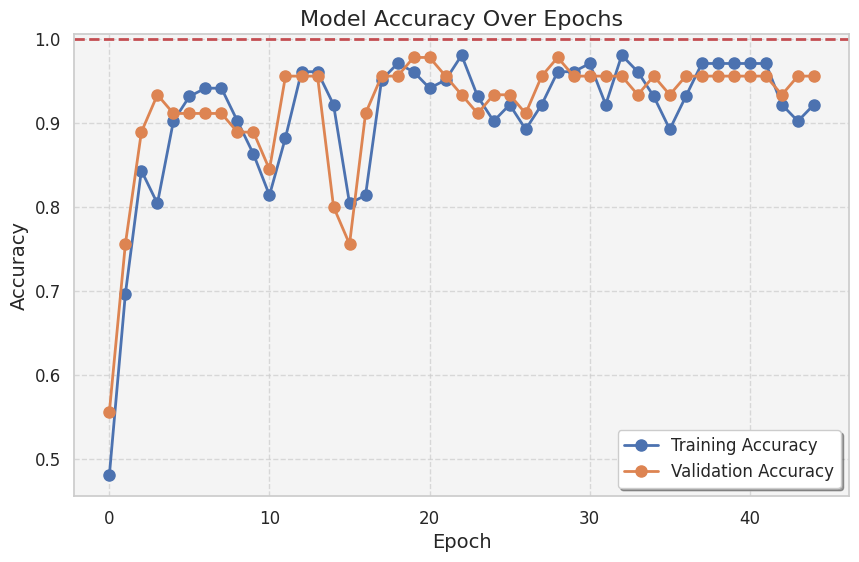

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy', linewidth=2, marker='o', markersize=8)
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2, marker='o', markersize=8)
plt.title('Model Accuracy Over Epochs', fontsize=16)
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12, shadow=True)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.gca().set_facecolor('#f4f4f4')
plt.axhline(y=1.0, color='r', linestyle='--', linewidth=2, label='Max Accuracy')
plt.show()